# Capstone Project - Battle of the Neighborhoods

### Coursera/IBM - Applied Data Science Capstone

### Table of Contents

1. Introduction: Problem    
2. Background
3. Data
4. Methodology
5. Results
6. Discussion
7. Conclusion


## Introduction: Problem

A movie theater chain is interested in exploring new outdoor business models, such as outdoor showings or drive-in theaters to implement post-COVID-19 in Seattle. The movie theater chain wants to better **understand customer segmentation in Seattle** based on venues around the city. They are also looking for a **location recommendation to implement and test these new outdoor business models in 2021**.

## Background

Box office revenues have declined from ~10.3B in 2019 to $2B in 2020 due to COVID-19 (boxofficemojo.com). Additionally, there has already been an ongoing shift to OTT platforms (such as Netflix and Hulu) over the past decade with consumers increasingly relying on these online streaming services for watching content. This has taken business away from traditional content distribution platforms including linear TV and movie theaters. 

Given these dual factors, it is an important question for the movie theater chain stakeholder to explore alternative business models and locations to help maintain its revenues/profits and to sustain the future health of the company and possibly entire movie theater industry. Outdoor showings and drive-in theaters are one possible alternative. 

Finally, it is suitable to have **Seattle** as a testing ground to find a location as it is less expensive to implement in this city vs. other larger metropolitan areas known for film such as Los Angeles or New York. If the chosen location is successful, then it can be launched in additional locations around the country using similar parameters/location data analysis.

## Data 

List of neighborhoods in Seattle:
* From the **Seattle government site** (https://www.seattle.gov/neighborhoods/neighborhoods-and-districts)
* Approximate latitude, longitude coordinates for neighborhood centers will be found using the **geopy** library

Foursquare location data will be used to analyze the following via the **Foursquare API**:
*	Frequency and type of venues in each neighborhood
*	Density/Number of existing movie theaters in each neighborhood

How this data will be used to solve the problem:
*	Both the foot traffic and density of movie theater and non-movie theater venues will be used to determine the optimal location selection for an outdoor showing/drive-in theater. The number of venues will be a proxy for the foot traffic/popularity of the neighborhood
    *	The recommended area will have at least some nearby outdoor-type venues but not be so densely populated to allow for social distancing 

First we'll import the necessary libraries to begin data analysis.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 -y # uncomment this line if you haven't completed the Foursquare API lab
! pip install folium==0.5.0
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0



geopy-2.0.0          | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

Next I'll use the list of neighborhoods from the Seattle government site (https://www.seattle.gov/neighborhoods/neighborhoods-and-districts) to create a dataset with neighborhood name information and save as a csv file. I will use the read_csv function to create an initial pandas dataframe.

In [2]:
df = pd.read_csv('Seattle_Neighborhood_Coords.csv')
df.head()

,Neighborhood,Latitude,Longitude
0,Jackson,47.597771,-122.329599
1,Admiral,47.581195,-122.386546
2,Aurora-Licton Springs,47.695534,-122.337623
3,Ballard,47.676507,-122.386223
4,Beacon Hill,47.579258,-122.311598


I will then update any neighborhood names that have the special characters "/", "-", or are not recognized by geopy 

In [3]:
# #Update the below neighborhood names to update names that have special characters "/" or "-" or are not recognized by geopy
# df.loc[[0],['Neighborhood']]='Jackson'
# df.loc[[12],['Neighborhood']]='Downtown'
# df.loc[[21],['Neighborhood']]='Madison'
# df.loc[[25],['Neighborhood']]='Rainier'
# df.loc[[39],['Neighborhood']] = 'Westwood Village'

Geopy is used to fill in the geographical coordinates of each neighborhood center.

In [4]:
# # iterate through each row and select  
# # Latitude and Longitude coordinates for each neighborhood respectively. 

# for i in range(len(df)) : 
#     address = str(df.loc[i,'Neighborhood'])+', Seattle'
    
#     geolocator = Nominatim(user_agent="Seattle_explorer")
#     location = geolocator.geocode(address)
#     latitude = location.latitude
#     longitude = location.longitude
    
#     df.loc[[i], ['Latitude']] = latitude # set the latitude
#     df.loc[[i], ['Longitude']] = longitude # set the longitude
# #     print(df.loc[i,'Neighborhood']+' The geograpical coordinates are {}, {}.'.format(latitude, longitude))
# print('Coordinates updated.')

In [5]:
print(df.shape)
# df.to_csv("Seattle_Neighborhood_Coords.csv")

(43, 3)


## Explore Dataset and Visualize Seattle Neighborhoods


I will use geopy to find the coordinates of Seattle, Washington and create a map with the neighborhoods superimposed using the folium library

In [6]:
address = 'Seattle, Washington'

geolocator = Nominatim(user_agent="Seattle_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Seattle are {}, {}.'.format(latitude, longitude))

seattle_center = [latitude, longitude]

The geograpical coordinates of Seattle are 47.6038321, -122.3300624.


In [8]:
# create map of Manhattan using latitude and longitude values
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

## Foursquare API


I will use the Foursquare API to gather venue data near each location within **800 meters** radius of each neighborhood and a limit of **150 venues** returned

In [9]:
CLIENT_ID = 'RAR3NJ0TR5IQZ2YSCDKO3UK444EZQ0XJB1I3LV4K1SLE1YVH' # your Foursquare ID
CLIENT_SECRET = 'O4LAQUYUMWASO0BKWCG2EROFRMWQCWR4NSJBR3JMDYA3DXBK' # your Foursquare Secret
ACCESS_TOKEN = 'H4CSE3AOGX0KYY1M0A4MZOPQOWAO4PY44NBBZ2FQHL5C1VVF' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 150

In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
#         print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [11]:
seattle_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Let's view the first few rows of the list of venues data for each neighborhood:

In [12]:
seattle_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Jackson,47.597771,-122.329599,Kinokuniya Book Store,47.597307,-122.326773,Bookstore
1,Jackson,47.597771,-122.329599,Uwajimaya,47.596855,-122.326864,Supermarket
2,Jackson,47.597771,-122.329599,Hood Famous Cafe + Bar,47.598007,-122.327767,Café
3,Jackson,47.597771,-122.329599,Dough Zone Dumpling House,47.597931,-122.327624,Dumpling Restaurant
4,Jackson,47.597771,-122.329599,Flatstick Pub,47.600143,-122.331002,Mini Golf


### Methodology

#### Exploratory Data Analysis 

In [13]:
seattle_venues_count = seattle_venues.groupby('Neighborhood').count().reset_index()
seattle_venues_count.sort_values('Venue',ascending=False, inplace=True)
seattle_venues_count.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
36,South Lake Union,100,100,100,100,100,100
15,Fremont,100,100,100,100,100,100
4,Belltown,100,100,100,100,100,100
38,University District,100,100,100,100,100,100
6,Capitol Hill,100,100,100,100,100,100


In [14]:
print('There are {} uniques categories.'.format(len(seattle_venues['Venue Category'].unique())))

There are 310 uniques categories.


I will plot a bar graph of number of venues in each neighborhood to view the density in each neighborhood.

In [15]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.3


Text(0.5, 0, 'Neighborhood')

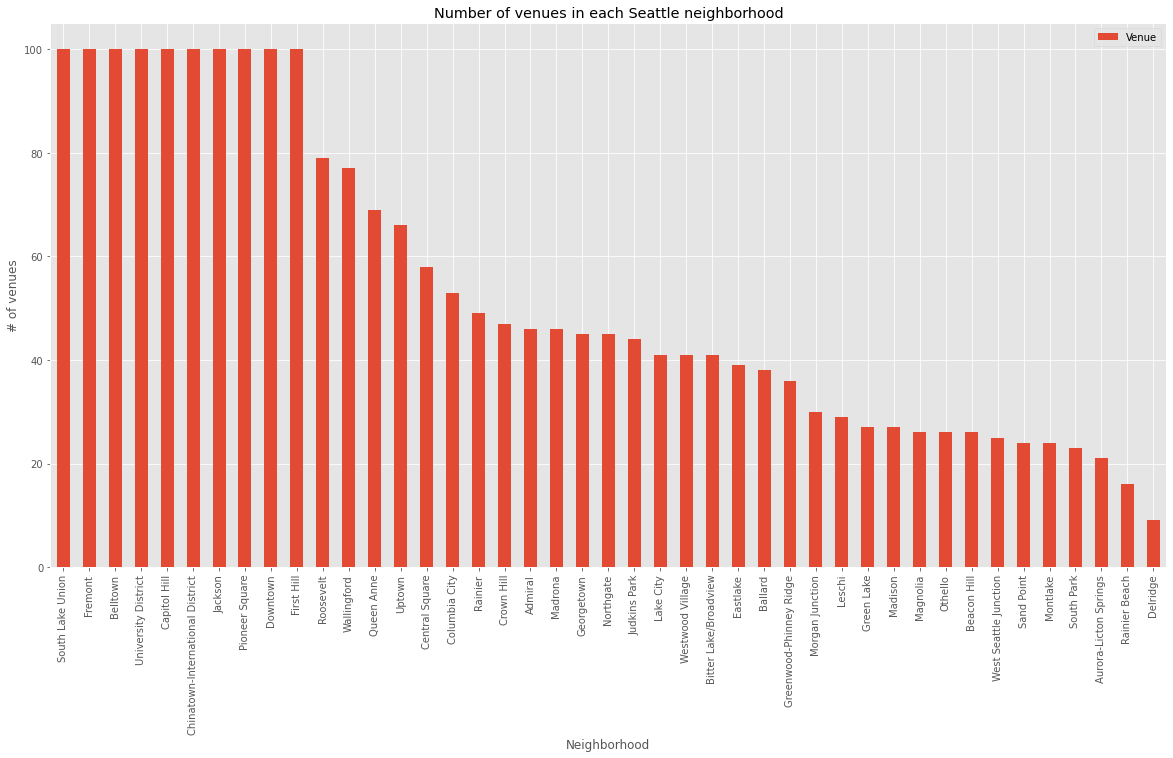

In [16]:
ax = seattle_venues_count.plot.bar(x='Neighborhood', y='Venue', figsize=(20, 10), rot=90)
plt.title('Number of venues in each Seattle neighborhood')
plt.ylabel('# of venues')
plt.xlabel('Neighborhood')

We'll also use one hot encoding technique to find the frequency of each venue type in each of the neighborhoods

In [17]:
# one hot encoding
seattle_onehot = pd.get_dummies(seattle_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
seattle_onehot['Neighborhood'] = seattle_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [seattle_onehot.columns[-1]] + list(seattle_onehot.columns[:-1])
seattle_onehot = seattle_onehot[fixed_columns]

Check the shape of the result:

In [18]:
seattle_onehot.shape

(2293, 310)

View the first few rows of the seattle_venues_freq data:

In [19]:
seattle_venues_freq = seattle_onehot.groupby('Neighborhood').sum().reset_index()
seattle_venues_freq.head()

,Neighborhood,Zoo Exhibit,ATM,African Restaurant,Airport,American Restaurant,Amphitheater,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Café,Cajun / Creole Restaurant,Camera Store,Canal,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community College,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Distillery,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fish & Chips Shop,Fish Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Home Service,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Inn,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pawn Shop,Peking Duck Restaurant,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Post Office,Print Shop,Pub,Public Art,Radio Station,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Restaurant,River,Rock Club,Rugby Pitch,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shopping Mall,Skate Park,Ski Area,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theate

Next, to further explore the data, I'll create a table showing the top 10 most common venues in each neighborhood:

In [20]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [21]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = seattle_venues_freq['Neighborhood']

for ind in np.arange(seattle_venues_freq.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(seattle_venues_freq.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Admiral,Coffee Shop,Park,Pet Store,Grocery Store,Pub,Pizza Place,Arts & Crafts Store,Spa,Scenic Lookout,Salon / Barbershop
1,Aurora-Licton Springs,Marijuana Dispensary,Chinese Restaurant,Brewery,Bus Station,General College & University,Sandwich Place,Park,Automotive Shop,Fabric Shop,Martial Arts School
2,Ballard,Coffee Shop,Park,Burger Joint,Bakery,Thai Restaurant,Drugstore,Jewelry Store,Gas Station,Bar,Baseball Field
3,Beacon Hill,Pub,Coffee Shop,Brewery,Mexican Restaurant,Café,Bowling Alley,Mediterranean Restaurant,Food Truck,Taco Place,Fried Chicken Joint
4,Belltown,Bar,Coffee Shop,Sushi Restaurant,Hotel,Cocktail Bar,Seafood Restaurant,Bakery,Breakfast Spot,New American Restaurant,Pizza Place


I will now extract the number of movie theaters in each neighborhood - note that these are locations where there is direct competition for the movie theater company. I will try to avoid these neighborhoods as possible recommendations for the movie theater company's outdoor business model efforts.

Text(0.5, 0, 'Neighborhood')

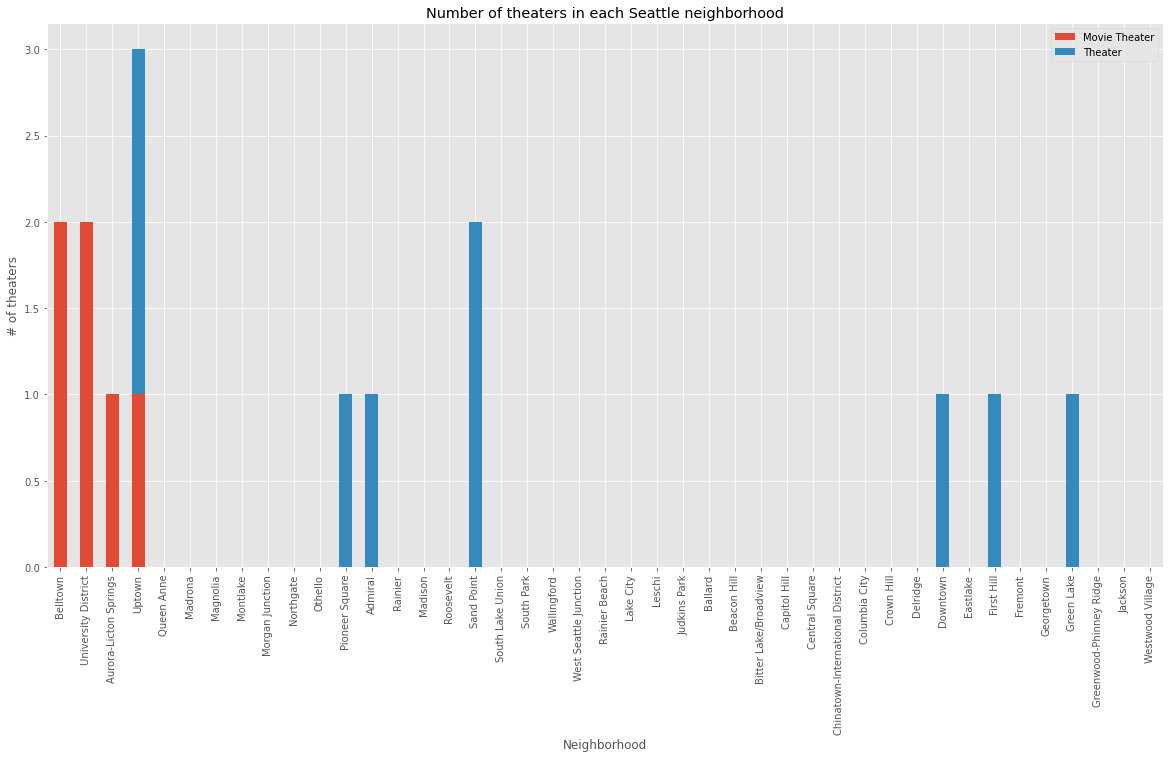

In [65]:
movie_theaters = seattle_venues_freq[['Neighborhood','Movie Theater','Theater']].sort_values(by=['Movie Theater'], ascending=False)
movie_theaters

ax = movie_theaters.plot.bar(x='Neighborhood', y=['Movie Theater','Theater'],stacked=True, figsize=(20, 10), rot=90)
plt.title('Number of theaters in each Seattle neighborhood')
plt.ylabel('# of theaters')
plt.xlabel('Neighborhood')

Next I'll create a heat map showing the density of venues around the city to find an optimal location for the outdoor showing/drive-in business model

In [24]:
venues_latlons = [[ven[1], ven[2]] for ven in seattle_venues.to_numpy()]

In [48]:
from folium import plugins
from folium.plugins import HeatMap

map_seattle = folium.Map(location=seattle_center, zoom_start=11)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  

folium.TileLayer('openstreetmap').add_to(map_seattle) #cartodbpositron cartodbdark_matter
HeatMap(venues_latlons).add_to(map_seattle)
folium.Marker(seattle_center).add_to(map_seattle)
folium.Circle(seattle_center, radius=2000, fill=False, color='white').add_to(map_seattle)
folium.Circle(seattle_center, radius=4000, fill=False, color='white').add_to(map_seattle)
folium.Circle(seattle_center, radius=6000, fill=False, color='white').add_to(map_seattle)

map_seattle

### K Means Testing

I'll cluster the neighborhoods to see their similarities/differences using the K Means algorithm

Since Seattle has the 3rd highest number of coffee shops per capita, I decided to drop the 'Coffee Shop' category to create more distinct clusters 

In [22]:
seattle_venues_freq = seattle_venues_freq.drop('Coffee Shop', axis=1)
seattle_venues_freq.head()

,Neighborhood,Zoo Exhibit,ATM,African Restaurant,Airport,American Restaurant,Amphitheater,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Café,Cajun / Creole Restaurant,Camera Store,Canal,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community College,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Distillery,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fish & Chips Shop,Fish Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Home Service,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Inn,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pawn Shop,Peking Duck Restaurant,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Post Office,Print Shop,Pub,Public Art,Radio Station,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Restaurant,River,Rock Club,Rugby Pitch,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shopping Mall,Skate Park,Ski Area,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park

To figure out the optimal number of clusters, I'll run an Elbow Method analysis:

In [26]:
seattle_elbow = seattle_venues_freq.drop('Neighborhood', 1)

In [49]:
seattle_elbow.head()

,Zoo Exhibit,ATM,African Restaurant,Airport,American Restaurant,Amphitheater,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Café,Cajun / Creole Restaurant,Camera Store,Canal,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community College,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Distillery,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fish & Chips Shop,Fish Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Home Service,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Inn,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pawn Shop,Peking Duck Restaurant,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Post Office,Print Shop,Pub,Public Art,Radio Station,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Restaurant,River,Rock Club,Rugby Pitch,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shopping Mall,Skate Park,Ski Area,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park Ride / Attra

I'll test out Kmeans for number of clusters ranging from 1 to 15:

In [28]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(seattle_elbow)
    distortions.append(kmeanModel.inertia_)

And create a plot of the Elbow Method results:

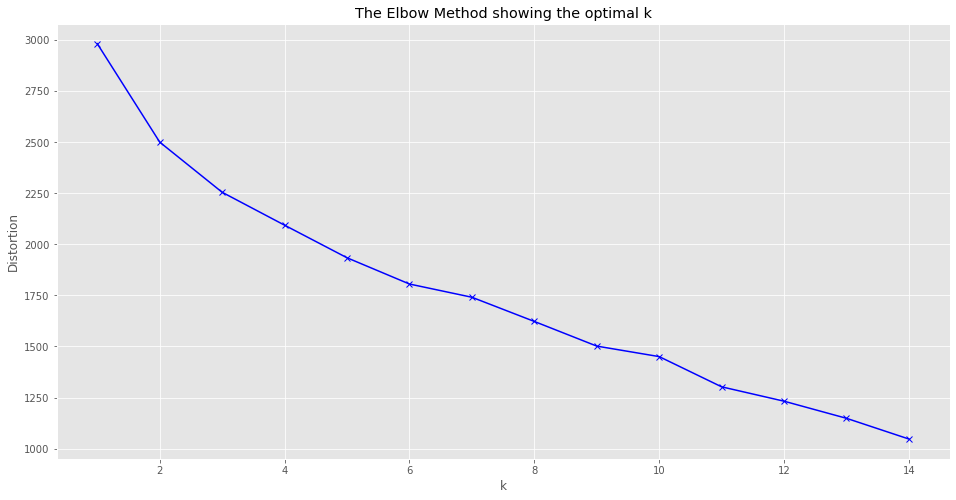

In [29]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

There appears to be no optimal elbow point; however, with some manual testing, I found that k=11 allows for adequate cluster separation, so I will use that as the number of clusters for analysis

In [30]:
# set number of clusters
kclusters = 11

seattle_grouped_clustering = seattle_venues_freq.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(seattle_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([ 9,  9,  1,  9,  7,  1,  3,  9,  2,  9,  9,  9,  0,  1,  8,  3,  9,
        9,  6,  2,  1,  9,  1,  9,  1,  1,  1,  9,  9,  9,  0,  1,  9,  9,
        9,  1,  4,  9,  5,  1, 10,  1,  1], dtype=int32)

I'll merge my seattle_merged data with the neighborhoods_venues_sorted data to get the latitude and longitude of each neighborhood and use this to create a **folium** plot with the different clusters later.

In [32]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
seattle_merged = df

# merge seattle_venues_freq with df to add latitude/longitude for each neighborhood
seattle_merged = seattle_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

seattle_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Jackson,47.597771,-122.329599,2,Chinese Restaurant,Coffee Shop,Cocktail Bar,Café,Sports Bar,Donut Shop,Thrift / Vintage Store,Bakery,Hotel,Bookstore
1,Admiral,47.581195,-122.386546,9,Coffee Shop,Park,Pet Store,Grocery Store,Pub,Pizza Place,Arts & Crafts Store,Spa,Scenic Lookout,Salon / Barbershop
2,Aurora-Licton Springs,47.695534,-122.337623,9,Marijuana Dispensary,Chinese Restaurant,Brewery,Bus Station,General College & University,Sandwich Place,Park,Automotive Shop,Fabric Shop,Martial Arts School
3,Ballard,47.676507,-122.386223,1,Coffee Shop,Park,Burger Joint,Bakery,Thai Restaurant,Drugstore,Jewelry Store,Gas Station,Bar,Baseball Field
4,Beacon Hill,47.579258,-122.311598,9,Pub,Coffee Shop,Brewery,Mexican Restaurant,Café,Bowling Alley,Mediterranean Restaurant,Food Truck,Taco Place,Fried Chicken Joint


### Cluster Analysis

I will attempt to categorize each of the 11 clusters based on the defining venue data and density of venues in each cluster type. First I'll use a bar graph to visualize the differences in clusters.

In [54]:
# merge seattle_venues_freq with seattle_merged 'Neighborhood' and 'Cluster Labels' to add frequency for each neighborhood
seattle_clusters = seattle_merged[['Neighborhood','Cluster Labels']].join(seattle_venues_freq.set_index('Neighborhood'), on='Neighborhood')

seattle_clusters = seattle_clusters.groupby('Cluster Labels').sum()

View the first few rows of the seattle_clusters data:

In [55]:
seattle_clusters.head()

,Zoo Exhibit,ATM,African Restaurant,Airport,American Restaurant,Amphitheater,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Café,Cajun / Creole Restaurant,Camera Store,Canal,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community College,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Distillery,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fish & Chips Shop,Fish Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gelato Shop,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Home Service,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Inn,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pawn Shop,Peking Duck Restaurant,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Post Office,Print Shop,Pub,Public Art,Radio Station,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Restaurant,River,Rock Club,Rugby Pitch,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shopping Mall,Skate Park,Ski Area,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park Ride / Attra

Transposing the data to find the top three most frequent venues in each cluster:

In [36]:
transp_clusters = seattle_clusters.transpose()

Next, we'll find the top three most frequent venues in each cluster.

In [37]:
top_n_venues = pd.DataFrame()
for column in transp_clusters:
#     print(transp_clusters[column].nlargest(3).to_frame())
    top_n_venues = top_n_venues.append(transp_clusters[column].nlargest(3).to_frame())
top_n_venues.reset_index(inplace=True)

In [38]:
top_n_venues = top_n_venues.groupby(['index']).sum()
top_n_venues.head()

,0,1,2,3,4,5,6,7,8,9,10
index,,,,,,,,,,,
Asian Restaurant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
Bar,0.0,0.0,0.0,13.0,0.0,0.0,0.0,6.0,0.0,20.0,5.0
Bus Stop,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Café,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0
Chinese Restaurant,0.0,0.0,15.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0


In [39]:
top_n_venues = top_n_venues.transpose()

In [40]:
top_n_venues.shape

(11, 19)

Then I'll create a plot to visualize this data of top three venues in each neighborhood.

Text(0.5, 1.0, 'Top Three Venues Per Neighborhood Cluster')

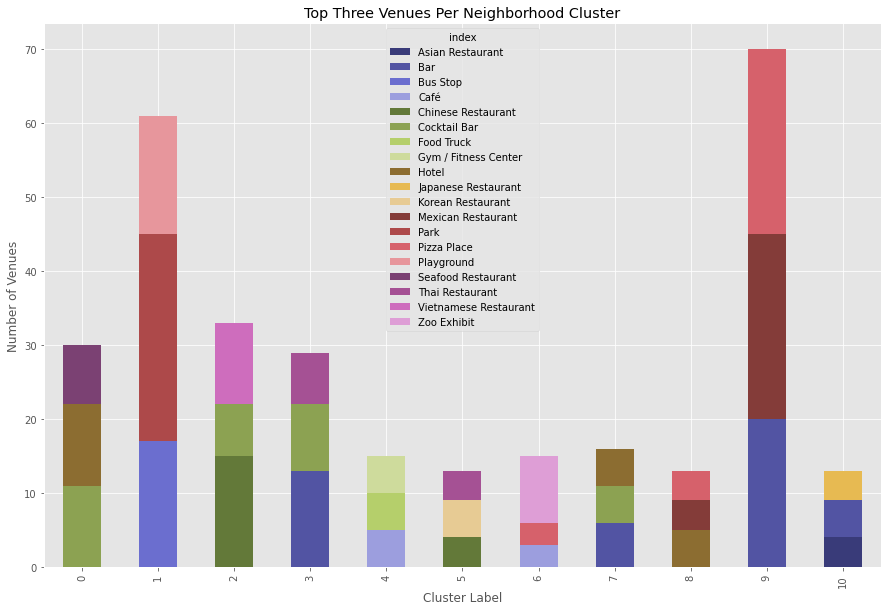

In [41]:
top_n_venues.plot(kind='bar', figsize=(15, 10), colormap = 'tab20b', stacked=True)

plt.xlabel('Cluster Label')
plt.ylabel('Number of Venues')
plt.title('Top Three Venues Per Neighborhood Cluster')

The clusters have the following categorizations:
* 0: Accomodations and Food
* 1: Outdoor Recreation and Transportation
* 2: Asian Restaurants and Bars
* 3: Bars and Asian Restaurants
* 4: Cafes and Gyms
* 5: Asian Restaurants
* 6: Zoos and Parks
* 7: Accomodations and Bars
* 8: Accomodations and General Dining
* 9: Bars and General Dining
* 10: Bars and Asian Restaurants

We will focus on clusters with access to transportation and/or outdoor areas. In this case, categories 1 and 6. We also see an abundance of categories that are similar, e.g. Bars and Asian Restaurants. Note the distinction is usually in the type of Asian restaurant, e.g. Thai, Chinese, etc. However for simplicity, I have categorized them together as 'Asian restaurants'.

Lets check which neighborhoods belong to cluster 1 and 6 and remove any neighborhoods with existing movie theaters to create a short list of possible recommended locations.

In [59]:
seattle_venues_freq[['Neighborhood']].loc[seattle_venues_freq['Theater']>0]

,Neighborhood
0,Admiral
12,Downtown
14,First Hill
17,Green Lake
30,Pioneer Square
35,Sand Point
39,Uptown


In [67]:
short_list = seattle_merged.loc[seattle_merged['Cluster Labels'].isin([1,6]) & ~seattle_merged['Neighborhood'].isin(['Belltown','University District','Aurora-Licton Springs','Uptown','Admiral','Downtown','First Hill','Green Lake','Pioneer Square','Sand Point', 'Uptown'])]
short_list.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Ballard,47.676507,-122.386223,1,Coffee Shop,Park,Burger Joint,Bakery,Thai Restaurant,Drugstore,Jewelry Store,Gas Station,Bar,Baseball Field
6,Bitter Lake/Broadview,47.726645,-122.352272,1,Fast Food Restaurant,Hobby Shop,Hotel,Bakery,Noodle House,Café,Seafood Restaurant,Sandwich Place,Chinese Restaurant,Coffee Shop
14,Eastlake,47.640825,-122.325723,1,Sandwich Place,Italian Restaurant,Coffee Shop,Pizza Place,Mexican Restaurant,Playground,Park,Boat or Ferry,Steakhouse,Ethiopian Restaurant
19,Greenwood-Phinney Ridge,47.669046,-122.360985,6,Zoo Exhibit,Café,Pizza Place,Bar,Brewery,Pub,Thrift / Vintage Store,New American Restaurant,Playground,Pie Shop
20,Judkins Park,47.590287,-122.302620,1,Park,Scenic Lookout,Gym / Fitness Center,Trail,Bus Station,Bus Stop,Beer Bar,Bowling Alley,Spa,Fast Food Restaurant


### Results


First we'll view a **folium map** of the clusters

In [62]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)+1))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(seattle_merged['Latitude'], seattle_merged['Longitude'], seattle_merged['Neighborhood'], seattle_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Finally, we'll combine the previous heat map of venue density, along with only the possible location recommendations found in the short_list.

In [70]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)+1))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(short_list['Latitude'], short_list['Longitude'], short_list['Neighborhood'], short_list['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)

folium.TileLayer('openstreetmap').add_to(map_clusters) #cartodbpositron cartodbdark_matter
HeatMap(venues_latlons).add_to(map_clusters)
folium.Marker(seattle_center).add_to(map_clusters)
folium.Circle(seattle_center, radius=2000, fill=False, color='white').add_to(map_clusters)
folium.Circle(seattle_center, radius=4000, fill=False, color='white').add_to(map_clusters)
folium.Circle(seattle_center, radius=6000, fill=False, color='white').add_to(map_clusters)

map_clusters

### Discussion

Based on the density of venues, I recommend areas around Magnolia, Westwood Village, and Bitterlake/Broadview as potential locations for the movie theater company to create outdoor showing/drive-in theater experiences. These all belong to cluster 1 and have characteristics of being near transportation, making it easily accessible to Seattleites and tourists alike. These areas also have plenty of outdoor areas and open space needed to implement the new outdoor business model in 2021. 

We also found that there is a large portion of venues dedicated to travel accomodations, outdoors, and asian restaurants, so I can tentatively recommend that movie content chosen can focuse on multiculural, action-adventure type of programming for Seattle viewers. However, further research is needed on customer segmentation, e.g. looking at population demographics data and/or comparing Seattle with other similar cities such as Portland or Vancouver to better understand the distinct viewing audience in Seattle and their differences from those cities (if any). 

Finally, I also observed in general that many of the clusters only have one or two venues, suggesting that perhaps further data is needed to create more evenly spaced clusters of neighborhoods, such as socioeconomic data, population data, parking data, etc. Carrying out these additional layers of analyses would allow the movie theater company to take into consideration all relevant factors to their decision with regards to finding a location.


### Conclusion

We found there are several viable candidates for a location to test outdoor screenings/drive-in movies. Based on the densities of venues around Seattle's 43 neighborhoods that were analyzed, we can see this is a good city for the movie theater company to implement their testing of new outdoor business models. This is the perhaps the right time for movie theater companies to pivot to new outdoors business models to sustain consumer interest at a time when social distancing and streaming movies at home is increasingly rising. Movie theater companies can use this type of data analysis in other cities to identify unique outdoor experience opportunities for their audiences.